# NAME : Souhardya Chattopadhyay


# Task2 : To predict Student's Percentage based on number of hours studied 

## Import Libraries and Data

In [ ]:
#Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Data
url= "http://bit.ly/w-data"
data= pd.read_csv(url)
print("The given data is imported successfully")

data

In [4]:
data.shape

(25, 2)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
# Viewing the Descriptive Statistics from the given Data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
data.sort_values(by="Scores")

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
20,2.7,30
4,3.5,30
16,2.5,30
22,3.8,35


In [55]:
data[data['Scores']>39].sort_values(by='Scores')

,Hours,Scores
12,4.5,41
13,3.3,42
1,5.1,47
21,4.8,54
7,5.5,60
11,5.9,62
18,6.1,67
19,7.4,69
3,8.5,75
23,6.9,76


In [56]:
data[data['Scores']<40].sort_values(by='Scores')

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
4,3.5,30
16,2.5,30
20,2.7,30
22,3.8,35


## Data Visualisation

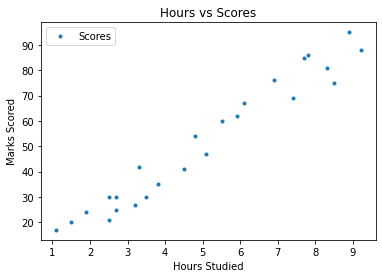

In [11]:
data.plot(x='Hours', y= 'Scores', style= '.')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel("Marks Scored")
plt.show()

## Linear Regression 

In [13]:
x= data['Hours'].values.reshape(-1,1)
y= data['Scores'].values

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

## Training the Model

In [36]:
from sklearn.linear_model import LinearRegression
regr= LinearRegression()
regr.fit(x_train, y_train)
print("Training complete")

Training complete


In [37]:
print(regr.intercept_)

2.018160041434683


In [38]:
print(regr.coef_)

[9.91065648]


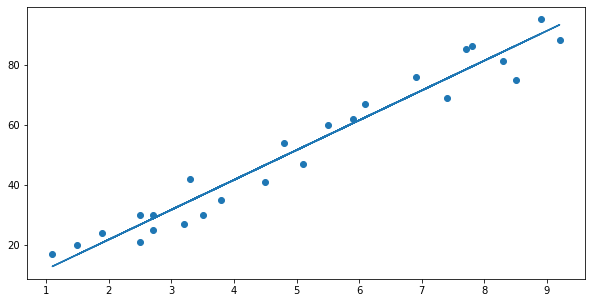

In [44]:
line = regr.coef_*x+regr.intercept_

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

## Check Accuracy Scores for train and test set

In [45]:
print('Test Score: ', regr.score(x_test, y_test))
print('Training Score: ', regr.score(x_train, y_train))

Test Score:  0.9454906892105356
Training Score:  0.9515510725211552


## Predictions

In [46]:
print(x_test)
y_pred = regr.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
print('Score of student who studied for 9.25 hours a day is ', regr.predict([[9.25]]))

Score of student who studied for 9.25 hours a day is  [93.69173249]


## Model Evaluation Metrics

In [54]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R_2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Absolute Error:  4.6474476121003665
R_2:  0.9454906892105356
